In [1]:
pip install wordcloud

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install gensim

# **Import**

In [4]:
import pandas as pd
import wordcloud
from sklearn.feature_extraction.text import TfidfVectorizer

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [5]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [6]:
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset_preprocessed.xlsx')
dataset.head()

Unnamed: 0.1  Unnamed: 0                             id_review  \
0             0           0  0Ay4eH9Vr4jS2CE7tK4BE1Vs9co3OD9hT2pg   
1             1           1  0BQ6Xi5iz8Wf4eX2PW6tQ9OS3mm8ZY7lU1Oz   
2             2           2  0Bf3Db0je6ZF7DB0RG6SF4JU2WN8dc3ni3cT   
3             3           5  0Ey1Dm3vB3fS1GA7Cr8Hs3bA8BT7Ut6Ke4xl   
4             4           6  0FL6IO5UE3LW7ZO4lL1IR4qm3gX4nU9iF4cv   

                                  review_clean_cased  \
0  Suka Bali area keluarga yang luar biasa x D me...   
1  Saya selalu berjalan di Pantai Sanur pada hari...   
2  Lokasi paling pas liat sunrise harus datang se...   
3  Tempatnya bagus selalu ramai oleh pengunjung s...   
4  pantai sanur banyak menyimpan misteri dan sang...   

                                  review_low_uncased  \
0  suka bali area keluarga yang luar biasa x d me...   
1  saya selalu berjalan di pantai sanur pada hari...   
2  lokasi paling pas liat sunrise harus datang se...   
3  tempatnya bagus selalu ramai oleh pengunjung s...   
4  pantai sanur banyak menyimpan misteri dan sang...   

                                              review attractions amenities  \
0  Suka Bali - area keluarga yang luar biasa_x000...        none      none   
1  Saya selalu berjalan di Pantai Sanur pada hari...     positif    netral   
2  Lokasi paling pas liat sunrise..harus datang s...     positif      none   
3  Tempatnya bagus, selalu ramai oleh pengunjung....     positif      none   
4  pantai sanur banyak menyimpan misteri dan sang...     positif      none   

  access    price  ...                                     amenities_text  \
0   none     none  ...                                               none   
1   none     none  ...  Setelah Anda berjalan anda dapat menikmati hid...   
2   none  positif  ...                                               none   
3   none     none  ...                                               none   
4   none     none  ...                                               none   

  access_text                                         price_text  \
0        none                                               none   
1        none                                               none   
2        none  Lokasi paling pas liat sunrise..harus datang s...   
3        none                                               none   
4        none                                               none   

                                      no_aspect_text  \
0  Suka Bali - area keluarga yang luar biasa menc...   
1  Saya selalu berjalan di Pantai Sanur pada hari...   
2                                               none   
3                                               none   
4                                               none   

                            cleaned_text_attractions  \
0                                               none   
1  lari tonton matahari terbit indah jalan inna g...   
2  lokasi pas liat sunrise jam santai bayar parki...   
3  tempat bagus ramai unjung salah pantai favorit...   
4  pantai sanur simpan misteri unjung lokal asing...   

                              cleaned_text_amenities cleaned_text_access  \
0                                               none                none   
1  jalan nikmat hidang lokal jalan nikmat hidang ...                none   
2                                               none                none   
3                                               none                none   
4                                               none                none   

                                  cleaned_text_price  \
0                                               none   
1                                               none   
2  lokasi pas liat sunrise jam santai bayar parki...   
3                                               none   
4                                               none   

                              cleaned_text_no_aspect  \
0  suka bal area keluarga cinta jalan bal tawar a

# **Aspek Price**

### **Text Positif**

In [7]:
# bukan "none" dan mengambil "positive"
df_price = dataset[(dataset['price'] != 'none') & ((dataset['price'] == 'positif'))]

df_price_positive = df_price[['cleaned_text_price']].values
teks_positif = df_price['cleaned_text_price']
print(teks_positif)
# df_price_positive.head()

2       lokasi pas liat sunrise jam santai bayar parki...
40      libur modal pas pas ya pantai sanur tempat mod...
48      warung makan malam restoran harga layan pijat ...
56      jual lokal murah kuta paksa bagus jual lokal m...
70                  murah sarap bagus tinggal murah sarap
                              ...                        
1601    masuk lokasi gratis klo gratis bangun pagi jam...
1609    jual goreng pinggir pantai jarga sahabat tani ...
1638    good makan pinggir pantai belah kanan nya enak...
1639    bayar parkir nikmat suasana pantai sanur bayar...
1644    masuk free bayar parkir motor mobil jual lumpi...
Name: cleaned_text_price, Length: 107, dtype: object


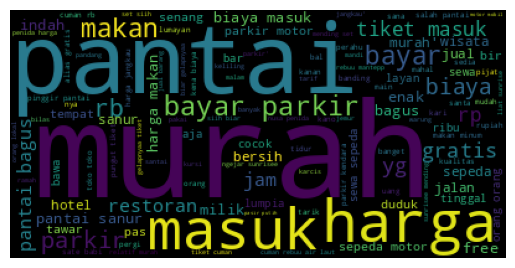

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

wordcloud = WordCloud().generate(str(df_price_positive))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# **LDA Topic Modelling**

In [9]:
def tokenisasi(text):
    tokens = text.split(" ")
    return tokens
tokens_positif = [tokenisasi(t) for t in teks_positif]
print(tokens_positif)

[['lokasi', 'pas', 'liat', 'sunrise', 'jam', 'santai', 'bayar', 'parkir', 'ko', 'ga', 'pakai', 'bayar', 'santai', 'bayar', 'parkir', 'ko', 'ga', 'pakai', 'bayar', 'lokasi', 'pas', 'liat', 'sunrise', 'jam', 'santai', 'bayar', 'parkir', 'ko', 'ga', 'pakai', 'bayar'], ['libur', 'modal', 'pas', 'pas', 'ya', 'pantai', 'sanur', 'tempat', 'modal', 'cuman', 'rb', 'parkir', 'beli', 'kopi', 'lumpia', 'wisatawan', 'mancanegara', 'sepi', 'toko', 'toko', 'souvenir', 'tutup', 'libur', 'modal', 'pas', 'pas', 'ya', 'pantai', 'sanur', 'tempat', 'modal', 'cuman', 'rb', 'parkir', 'beli', 'kopi', 'lumpia', 'libur', 'modal', 'pas', 'pas', 'ya', 'pantai', 'sanur', 'tempat', 'modal', 'cuman', 'rb', 'parkir', 'beli', 'kopi', 'lumpia', 'wisatawan', 'mancanegara', 'sepi', 'toko', 'toko', 'souvenir', 'tutup'], ['warung', 'makan', 'malam', 'restoran', 'harga', 'layan', 'pijat', 'manikur', 'sedia', 'warung', 'makan', 'malam', 'restoran', 'harga', 'layan', 'pijat', 'manikur', 'sedia', 'warung', 'makan', 'malam', 'r

In [10]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(tokens_positif)
# Create Corpus
# Term Frequency
corpus = [id2word.doc2bow(text) for text in tokens_positif]
# View
print(id2word)
print(corpus[:1])

Dictionary<444 unique tokens: ['bayar', 'ga', 'jam', 'ko', 'liat']...>
[[(0, 6), (1, 3), (2, 2), (3, 3), (4, 2), (5, 2), (6, 3), (7, 3), (8, 2), (9, 3), (10, 2)]]


In [11]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('bayar', 6),
  ('ga', 3),
  ('jam', 2),
  ('ko', 3),
  ('liat', 2),
  ('lokasi', 2),
  ('pakai', 3),
  ('parkir', 3),
  ('pas', 2),
  ('santai', 3),
  ('sunrise', 2)]]

In [12]:
# Build LDA model
import gensim
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=3,random_state=100,chunksize=100,passes=10,per_word_topics=True)

In [13]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics,random_state=100,chunksize=100,passes=10,per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

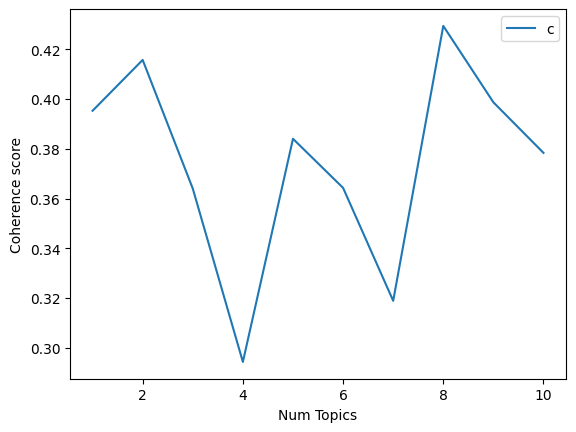

coherence_values:  [0.3952951568923355, 0.4157283099663651, 0.3639928170892353, 0.29428608508590415, 0.3840237710538627, 0.3642783449170919, 0.31886452051078307, 0.4294090552986988, 0.39869999221778046, 0.3783639708943282]


In [14]:
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(id2word, corpus, tokens_positif, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)

plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
print("coherence_values: ", coherence_values)

In [15]:
lda_model.print_topics() #num_word default is 10

[(0,
  '0.063*"biaya" + 0.057*"parkir" + 0.053*"pantai" + 0.052*"gratis" + 0.034*"orang" + 0.033*"rb" + 0.029*"masuk" + 0.025*"favorit" + 0.025*"salah" + 0.025*"pagi"'),
 (1,
  '0.084*"pantai" + 0.057*"bayar" + 0.050*"parkir" + 0.032*"jual" + 0.029*"pinggir" + 0.028*"harga" + 0.026*"masuk" + 0.025*"sanur" + 0.023*"nikmat" + 0.023*"motor"'),
 (2,
  '0.061*"murah" + 0.049*"gratis" + 0.035*"masuk" + 0.031*"jam" + 0.025*"lokasi" + 0.024*"karcis" + 0.023*"pagi" + 0.022*"klo" + 0.022*"an" + 0.022*"hehe"')]

In [16]:
print("Topic distribution for document :", " ".join(tokens_positif[0]))
print("feature of each token:", [(id2word[id], freq) for id, freq in corpus[0]])
lda_model.get_document_topics(corpus[0])

Topic distribution for document : lokasi pas liat sunrise jam santai bayar parkir ko ga pakai bayar santai bayar parkir ko ga pakai bayar lokasi pas liat sunrise jam santai bayar parkir ko ga pakai bayar
feature of each token: [('bayar', 6), ('ga', 3), ('jam', 2), ('ko', 3), ('liat', 2), ('lokasi', 2), ('pakai', 3), ('parkir', 3), ('pas', 2), ('santai', 3), ('sunrise', 2)]


[(0, 0.010773707), (1, 0.7461675), (2, 0.24305879)]

In [17]:
import pandas as pd
def format_topics_sentences(ldamodel, corpus, texts):
      # Init output
      sent_topics_df = pd.DataFrame()

      # Get main topic in each document
      for i, row in enumerate(ldamodel[corpus]):
          row = sorted(row[0], key=lambda x: (x[1]), reverse=True)

          # Get the Dominant topic, Perc Contribution and Keywords for each document
          for j, (topic_num, prop_topic) in enumerate(row):
              if j == 0: # => dominant topic
                   wp = ldamodel.show_topic(topic_num, 5) #get most  significant topic
                   topic_keywords = ", ".join([word for word, prop in wp])
                   sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
              else:
                   break
      sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

      # Add original text to the end of the output
      contents = pd.Series(texts)
      sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
      return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=tokens_positif)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Topic Keywords', 'Text']

#Save to csv
df_dominant_topic.to_csv('/content/drive/MyDrive/Colab Notebooks/doc_topic_dominant_price_positive.csv')
# Show
df_dominant_topic.head(5)

<ipython-input-17-b67f12f3ef3f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-17-b67f12f3ef3f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-17-b67f12f3ef3f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-17-b67f12f3ef3f>:15: FutureWarning: The frame.append method is deprecated and will be removed from p

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               1              0.7462   
1            1               0              0.5723   
2            2               2              0.9755   
3            3               2              0.5624   
4            4               2              0.9043   

                         Topic Keywords  \
0  pantai, bayar, parkir, jual, pinggir   
1  biaya, parkir, pantai, gratis, orang   
2     murah, gratis, masuk, jam, lokasi   
3     murah, gratis, masuk, jam, lokasi   
4     murah, gratis, masuk, jam, lokasi   

                                                Text  
0  [lokasi, pas, liat, sunrise, jam, santai, baya...  
1  [libur, modal, pas, pas, ya, pantai, sanur, te...  
2  [warung, makan, malam, restoran, harga, layan,...  
3  [jual, lokal, murah, kuta, paksa, bagus, jual,...  
4       [murah, sarap, bagus, tinggal, murah, sarap]

In [18]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model,
texts=tokens_positif, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3639928170892353


In [19]:
coherence_per_topic = coherence_model_lda.get_coherence_per_topic()
print('\nCoherence Per Topic Score: ', coherence_per_topic)


Coherence Per Topic Score:  [0.4501233961489214, 0.36645489969122713, 0.2754001554275575]


In [20]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn

In [21]:
pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 35.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [22]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
# Visualize the topics

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.026760 -0.214301       1        1  40.756950
1     -0.192774  0.128014       2        1  39.455188
0      0.219534  0.086287       3        1  19.787862, topic_info=       Term       Freq       Total Category  logprob  loglift
0     bayar  63.000000   63.000000  Default  30.0000  30.0000
167   biaya  36.000000   36.000000  Default  29.0000  29.0000
7    parkir  87.000000   87.000000  Default  28.0000  28.0000
41    murah  72.000000   72.000000  Default  27.0000  27.0000
105  gratis  83.000000   83.000000  Default  26.0000  26.0000
..      ...        ...         ...      ...      ...      ...
328    pagi  13.705496   39.473815   Topic3  -3.6898   0.5623
18   pantai  29.125414  135.445262   Topic3  -2.9360   0.0831
107   masuk  15.680481   84.057478   Topic3  -3.5552  -0.0590
24     toko   2.747690    6.779806   Topic3  -5.2968   0.7169
72       yg   1.777111    8.359784   Topic3  -5.7326   0.0717

[144 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
415       3  0.465188       a
434       1  0.985483      an
324       1  1.001384    anak
121       2  0.988745   angin
422       3  0.928140  anjing
...     ...       ...     ...
433       3  0.928140   track
438       1  0.985483  tukang
72        1  0.239241      yg
72        2  0.478481      yg
72        3  0.239241      yg

[136 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])